In [1]:
import pandas as pd
from pathlib import Path

def read_reg_lines(path:Path) -> pd.DataFrame:
    return pd.read_csv(path)

In [2]:
path1 = Path(
    r"F:\\απο  την επιφανια  εργασια\\create data\\setdata\\return\\final\\tables\\country_metrics.csv"
)
# F:\απο  την επιφανια  εργασια\create data\setdata\return\final\tables\country_metrics.csv
country_metrics = read_reg_lines(path1)

In [3]:
country_metrics

,country,continent,slope,Country Name,avg_population,slope_per_1000,block
0,Afghanistan,ASIA,3595.247324,Afghanistan,1.962018e+07,0.183242,Neutral (≈)
1,Albania,EUROPE,-813.903408,Albania,2.667992e+06,-0.305062,Bottom (↓)
2,Algeria,Africa,-438.971699,Algeria,2.664175e+07,-0.016477,Bottom (↓)
3,American Samoa,OCEANIA,35.444075,American Samoa,4.249637e+04,0.834049,Bottom (↓)
4,Andorra,EUROPE,183.078258,Andorra,5.167646e+04,3.542779,Neutral (≈)
...,...,...,...,...,...,...,...
230,Wallis and Futuna Islands,OCEANIA,14.961117,NaN,NaN,NaN,Bottom (↓)
231,Western Sahara,Africa,94.634798,NaN,NaN,NaN,Neutral (≈)
232,Yemen,ASIA,9688.955211,NaN,NaN,NaN,Top (↑)
233,Zambia,Africa,-3049.446536,Zambia,9.521235e+06,-0.320278,Bottom (↓)


In [15]:
block_by_continent = (
    country_metrics
    .groupby(["continent", "block"], observed=False)
    .size()
    .reset_index(name="countries")
)
block_by_continent

,continent,block,countries
0,ASIA,Bottom (↓),18
1,ASIA,Neutral (≈),11
2,ASIA,Top (↑),22
3,Africa,Bottom (↓),18
4,Africa,Neutral (≈),18
5,Africa,Top (↑),22
6,EUROPE,Bottom (↓),12
7,EUROPE,Neutral (≈),17
8,EUROPE,Top (↑),19
9,Latin America and the Caribbean,Bottom (↓),13


In [17]:
block_by_continent["percent_within_continent"] = (
    block_by_continent
    .groupby("continent")["countries"]
    .transform(lambda x: x / x.sum() * 100)
)
block_by_continent

,continent,block,countries,percent_within_continent
0,ASIA,Bottom (↓),18,35.294118
1,ASIA,Neutral (≈),11,21.568627
2,ASIA,Top (↑),22,43.137255
3,Africa,Bottom (↓),18,31.034483
4,Africa,Neutral (≈),18,31.034483
5,Africa,Top (↑),22,37.931034
6,EUROPE,Bottom (↓),12,25.000000
7,EUROPE,Neutral (≈),17,35.416667
8,EUROPE,Top (↑),19,39.583333
9,Latin America and the Caribbean,Bottom (↓),13,24.528302


In [19]:
block_order = ["Top (↑)", "Neutral (≈)", "Bottom (↓)"]

block_by_continent["block"] = pd.Categorical(
    block_by_continent["block"],
    categories=block_order,
    ordered=True
)

block_by_continent = block_by_continent.sort_values(
    ["continent", "block"]
)
block_by_continent

,continent,block,countries,percent_within_continent
2,ASIA,Top (↑),22,43.137255
1,ASIA,Neutral (≈),11,21.568627
0,ASIA,Bottom (↓),18,35.294118
5,Africa,Top (↑),22,37.931034
4,Africa,Neutral (≈),18,31.034483
3,Africa,Bottom (↓),18,31.034483
8,EUROPE,Top (↑),19,39.583333
7,EUROPE,Neutral (≈),17,35.416667
6,EUROPE,Bottom (↓),12,25.000000
11,Latin America and the Caribbean,Top (↑),12,22.641509


In [20]:
block_by_continent.to_csv(
    r"F:\\απο  την επιφανια  εργασια\\create data\\setdata\\code\\python\\block_by_continent.csv",
    index=False)

In [21]:
pivot_block_by_continent = (
    block_by_continent
    .pivot(
        index="continent",
        columns="block",
        values="countries"
    )
    .fillna(0)
    .astype(int)
)
pivot_block_by_continent

block,Top (↑),Neutral (≈),Bottom (↓)
continent,,,
ASIA,22,11,18
Africa,22,18,18
EUROPE,19,17,12
Latin America and the Caribbean,12,28,13
OCEANIA,2,5,16


In [22]:
pivot_block_by_continent.to_csv(
     "block_by_continent_pivot.csv",
        index=False
)


In [23]:
# Πρέπει να ισούται με τον συνολικό αριθμό χωρών
block_by_continent["countries"].sum(), country_metrics.shape[0]


(np.int64(233), 235)

In [24]:
import pandas as pd

continent_block = (
    country_metrics
    .groupby(["continent", "block"], observed=False)
    .size()
    .unstack(fill_value=0)
)

# Προαιρετική ταξινόμηση ηπείρων
continent_block = continent_block.loc[
    ["Africa", "ASIA", "EUROPE", "Latin America and the Caribbean", "OCEANIA"]
]

continent_block


block,Bottom (↓),Neutral (≈),Top (↑)
continent,,,
Africa,18,18,22
ASIA,18,11,22
EUROPE,12,17,19
Latin America and the Caribbean,13,28,12
OCEANIA,16,5,2


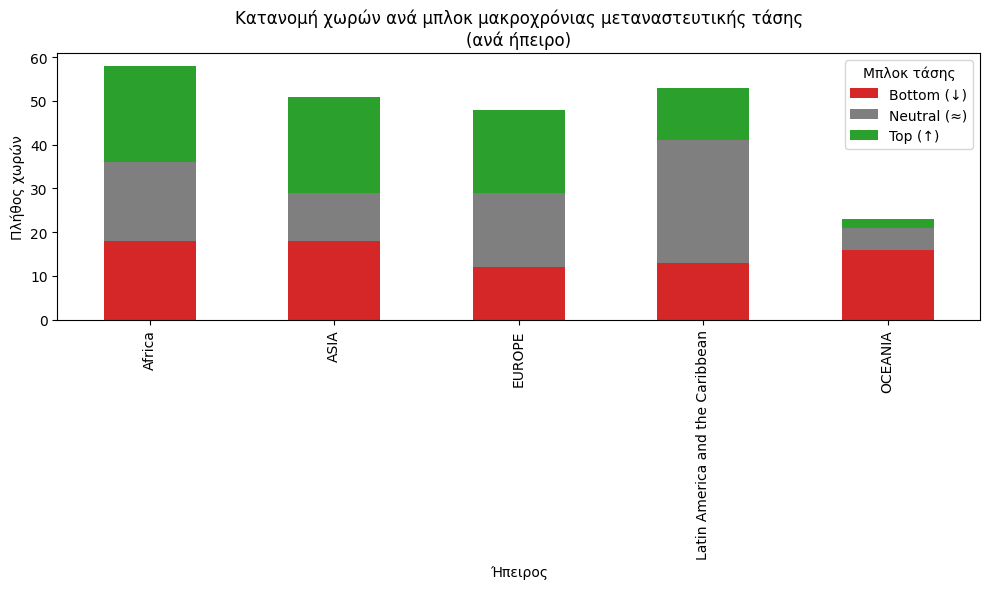

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

continent_block[
    ["Bottom (↓)", "Neutral (≈)", "Top (↑)"]
].plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#d62728", "#7f7f7f", "#2ca02c"]
)

ax.set_title("Κατανομή χωρών ανά μπλοκ μακροχρόνιας μεταναστευτικής τάσης\n(ανά ήπειρο)")
ax.set_ylabel("Πλήθος χωρών")
ax.set_xlabel("Ήπειρος")

ax.legend(
    title="Μπλοκ τάσης",
    loc="upper right"
)

plt.tight_layout()
plt.show()


In [33]:
ax.legend(
    title="Μπλοκ τάσης",
    bbox_to_anchor=(1.02, 8),
    loc="upper left"
)


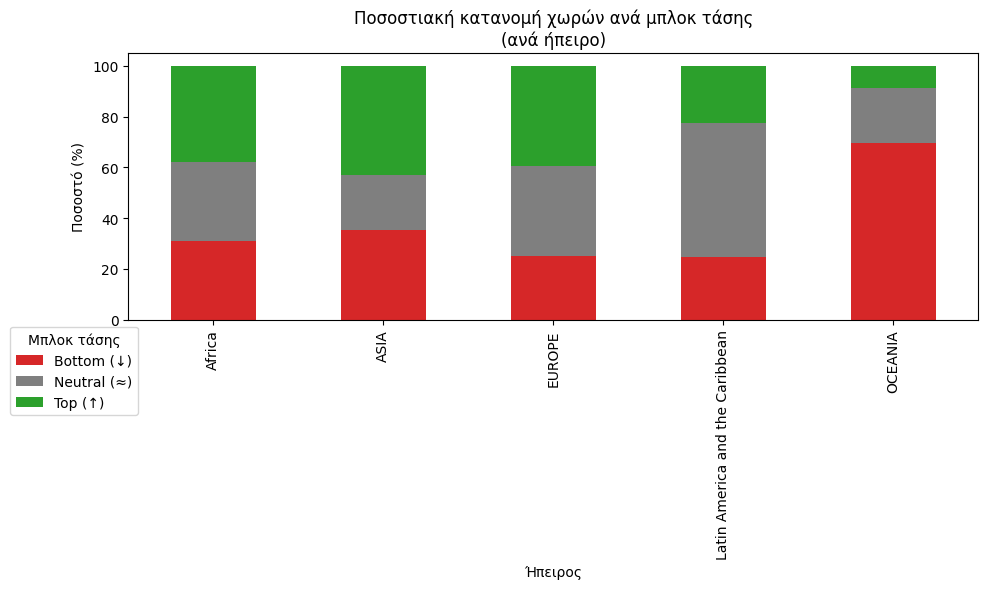

In [40]:
continent_block_pct = continent_block.div(
    continent_block.sum(axis=1), axis=0
) * 100

fig, ax = plt.subplots(figsize=(10, 6))

continent_block_pct[
    ["Bottom (↓)", "Neutral (≈)", "Top (↑)"]
].plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=["#d62728", "#7f7f7f", "#2ca02c"]
)

ax.set_title("Ποσοστιακή κατανομή χωρών ανά μπλοκ τάσης\n(ανά ήπειρο)")
ax.set_ylabel("Ποσοστό (%)")
ax.set_xlabel("Ήπειρος")

ax.legend(
    title="Μπλοκ τάσης",
    bbox_to_anchor=(0.02, 0.0),
    loc="upper right"
)

plt.tight_layout()
plt.show()
